## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Инструкция по выполнению проекта

### Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.
* Задайте самостоятельно пороговое значение alpha.
Поясните:
** Как вы сформулировали нулевую и альтернативную гипотезы;
** Какой критерий применили для проверки гипотез и почему.

### Шаг 6. Напишите общий вывод

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Импорт данных, общая информация

In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from phik import phik_matrix
from prettytable import PrettyTable
from pymystem3 import Mystem
from scipy import stats as st
import seaborn as sns
from wordcloud import WordCloud

m = Mystem()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('C:/Users/anton/OneDrive/data_science/practicum_projects/datasets/games.csv')
except:
    print('Path not found')

In [3]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# Переименуем сразу столбцы
data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Типы данных в `year_of_release` и `user_score` требуют корректировки.

Также присутствуют пропуски, обратить внимание

## Предобработка данных

### Обработка пропусков

In [7]:
(
    round(data.isna().mean()*100,3)
        .sort_values(ascending=False)
        .to_frame().style.background_gradient('coolwarm')
)

,0
critic_score,51.319000
rating,40.479000
user_score,40.090000
year_of_release,1.609000
name,0.012000
genre,0.012000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Удалим сразу пропуски в `name` и `genre`, т.к. их доля все-равно мала.

Также предлагаю удалить пропуски в `year_of_release`, поскольку без знания года релиза мы не сможем отобрать конкретный период.

В столбцах `critic_score`, `rating` и `user_score` пропусков очень мгого - нужно будет учесть при EDA.

Остальные значения оставим как есть.

In [8]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

### Изменение типов данных

In [9]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Тип данных нужно изменить в `user_score` и `year_of_release`.

In [10]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо оценок критиков в 'user_score' присутствуют значения 'tbd'

In [11]:
tbd_percent = (data['user_score'] == 'tbd').mean()
print(f"Количество значений 'tbd' в датасете: {tbd_percent:.2%}")

Количество значений 'tbd' в датасете: 14.45%


По информации от заказчика 'tbd' означает, что оценка еще не была сформирована. Таким образом, можно заменить это значение на обычное NaN.

In [12]:
# Меняем значения на NaN
data['user_score'] = np.where(data['user_score'] == 'tbd', float('NaN'), data['user_score'])

# Меняем типы данных
data['user_score'] = data['user_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int64')

In [13]:
# Проверяем
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Добавим столбцы

In [14]:
# Добавим колонку с общими продажами
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Также добавим колонку с названиями игр в нижнем регистре
data['name_lower'] = data['name'].str.lower()

# Разбивка оценок критиков и пользователей на группы
data['critic_score_groups'] = pd.cut(
    data['critic_score'],
    bins=[0,50,75,100],
    labels=['lower than average', 'good', 'excellent']
)

data['user_score_groups'] = pd.cut(
    data['user_score'],
    bins=[0,5,7.5,10],
    labels=['lower than average', 'good', 'excellent']
)

### Поиск дубликатов

Проверим наличие дубликатов, учитывая только `name`, `platform` и `year_of_release`

In [15]:
data[data.duplicated(subset=['name_lower', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_lower,critic_score_groups,user_score_groups
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56,madden nfl 13,excellent,good
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01,madden nfl 13,excellent,good


Две задублированных игры. Оставим одну.

In [16]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

### Изучение аномалий, выбор диапазона актуальных значений

#### Аномалии в числовых данных

Гистограммы для всех числовых данных

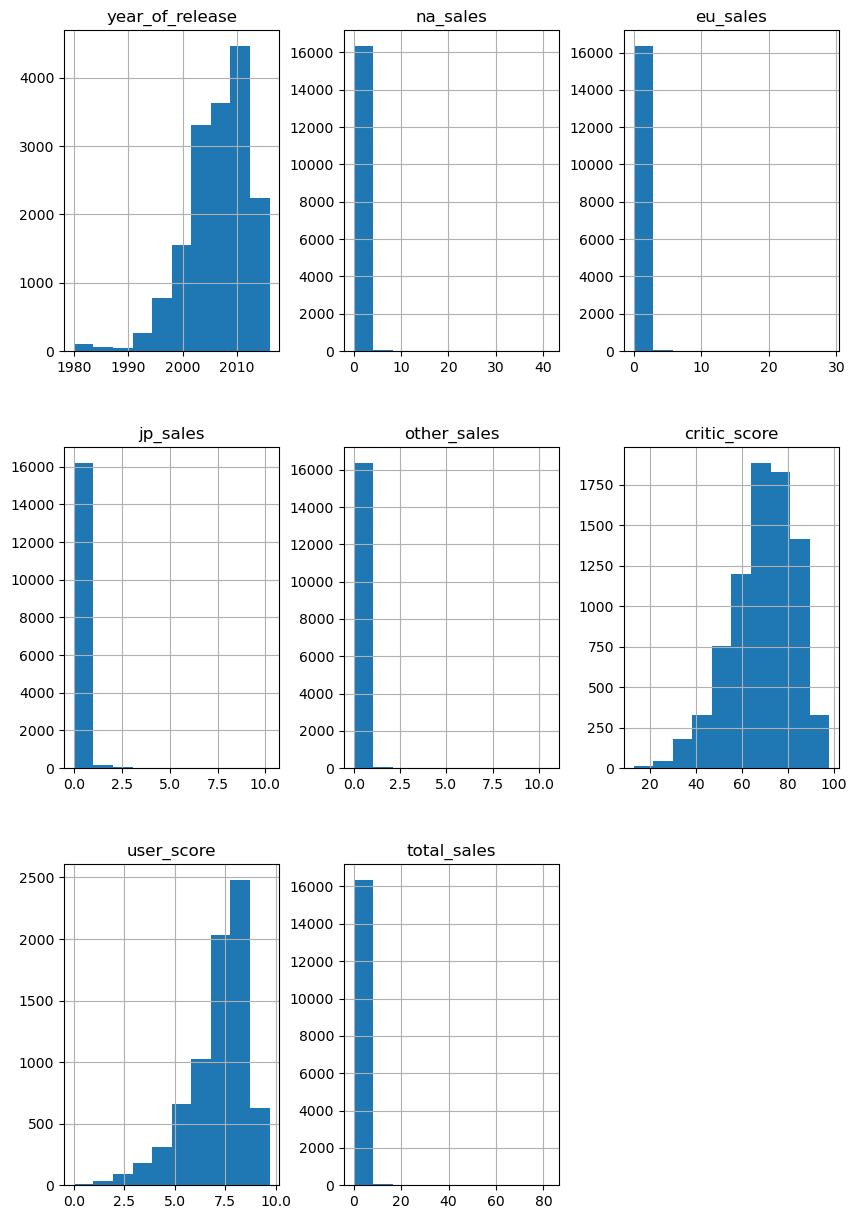

In [17]:
# Для этого построим гистограмму для всего датафрейма:
data.hist(figsize=(10, 15))
plt.show()

Сильно выбивающиеся значения присутствуют только в столбцах с количеством проданных копий, т.е. в таргете. В EDA мы как раз и будем искать закономерности, что же на это (на количество проданных копий) влияет

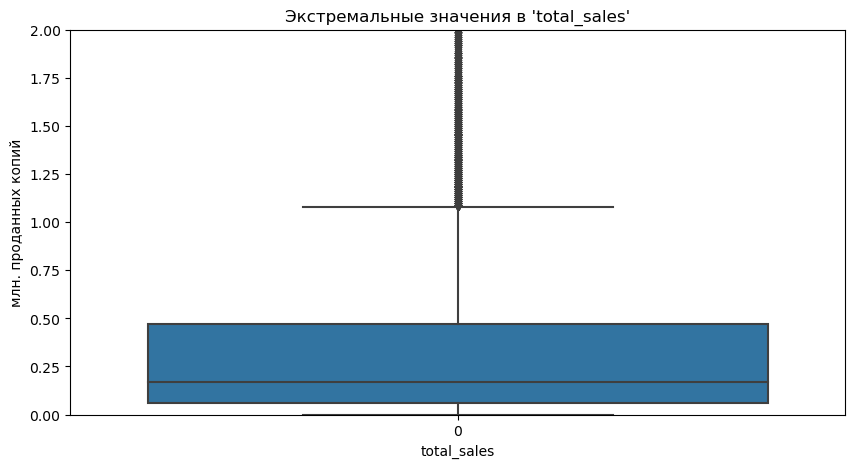

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=data['total_sales'])
plt.xlabel('total_sales')
plt.ylabel('млн. проданных копий')
plt.title("Экстремальные значения в 'total_sales'")

plt.ylim((0, 2))

plt.show()

In [19]:
len(data[data['total_sales'] > 1.5])

1242

В основном, данные содержат информацию об играх с продажами не более 1-1.5 млн копий по всему миру. Но игр за пределом правого "уса" тоже довольно много.

Будем считать, что аномалий в числовых данных нет. Значения в таргете - количество проданных копий - нужно будет попробовать объяснить.

#### Аномалии в категориальных данных

In [20]:
data['rating'].value_counts()

rating
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

Можно выкинуть из общего датасета игры с рейтингом EC, K-A, A0 и RP, чтобы они не мешались дальше, т.к. таких игр всего несколько штук.

In [21]:
# Удаляем ненужные строки
data = data[~data['rating'].isin(['EC', 'K-A', 'AO', 'RP'])]

In [22]:
data['genre'].value_counts()

genre
Action          3305
Sports          2305
Misc            1715
Role-Playing    1481
Shooter         1296
Adventure       1291
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         670
Puzzle           569
Name: count, dtype: int64

В жанрах удалять нечего

In [23]:
data['platform'].value_counts()

platform
PS2     2126
DS      2119
PS3     1305
Wii     1284
X360    1232
PSP     1193
PS      1189
PC       952
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

В платформах пока тоже ничего не удаляем, позже еще будет выбор актуального периода и актуальных платформ

## Исследовательский анализ данных

### Анализ актуальных платформ

In [24]:
# Сгруппируем данные, чтобы получить общие продажи по каждой платформе за каждый год
platform_sales_by_years = data.groupby(['platform', 'year_of_release'])['total_sales'].sum()

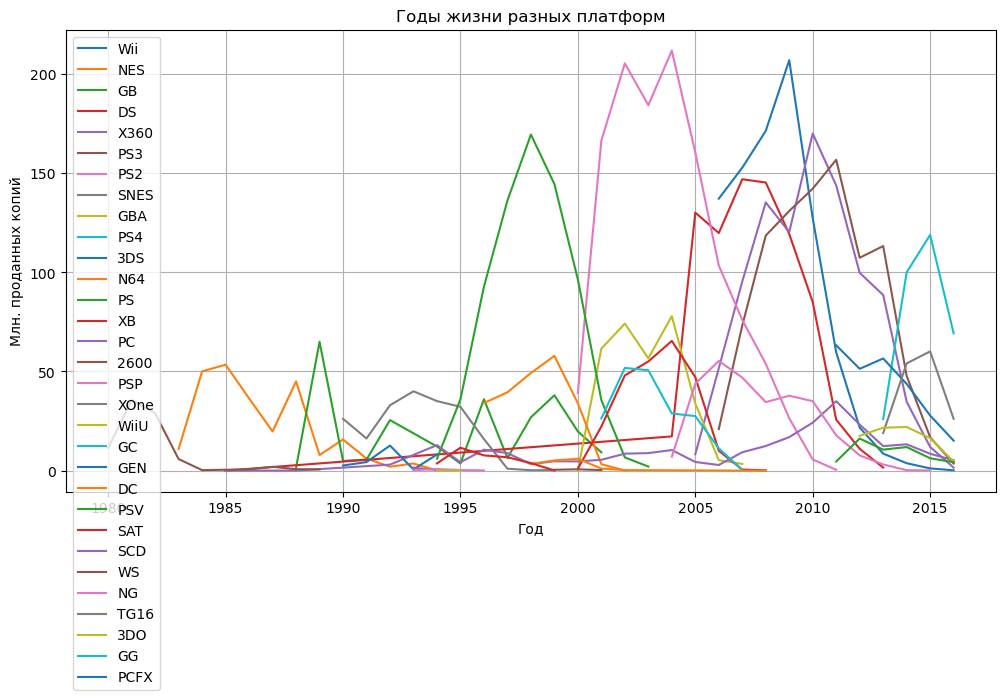

In [25]:
# Нарисуем график "жизни" платформ
plt.rcParams["figure.figsize"] = (12,6)

for i in data['platform'].unique():
    plt.plot(platform_sales_by_years.loc[i], label=i)
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий')
plt.title('Годы жизни разных платформ')
plt.legend()
plt.grid(visible=True)

plt.show()

Датасет содержит данные за очень большой отрезок времени. Выберем более актуальный диапазон, например, для начала игры от 2012 года и старше.

Также данные можно представить в виде таблицы - хитмапа, применив .background_gradient()

In [26]:
# Срез данных по году
good_data = data[data['year_of_release'] >= 2012]

In [27]:
# Сгруппируем данные, чтобы получить суммарные продажи по каждой платформе за каждый год
print('Суммарные продажи по платформам:')
platform_sales_total = good_data.groupby(['year_of_release', 'platform'])['total_sales'].sum()
platform_sales_total = platform_sales_total.unstack(fill_value=0).sort_values(2015, axis=1, ascending=False)
platform_sales_total.style.background_gradient(cmap='YlOrRd')
# Можно поменять на pd.pivot_table

Суммарные продажи по платформам:


platform,PS4,XOne,3DS,PS3,WiiU,X360,PC,PSV,Wii,PSP,DS
year_of_release,,,,,,,,,,,
2012,0.000000,0.000000,51.360000,107.350000,17.560000,99.740000,23.220000,16.190000,21.710000,7.690000,11.010000
2013,25.990000,18.960000,56.570000,113.250000,21.650000,88.580000,12.380000,10.590000,8.590000,3.140000,1.540000
2014,100.000000,54.070000,43.760000,47.760000,22.030000,34.740000,13.280000,11.900000,3.750000,0.240000,0.000000
2015,118.900000,60.140000,27.780000,16.820000,16.350000,11.960000,8.520000,6.250000,1.140000,0.120000,0.000000
2016,69.250000,26.150000,15.140000,3.600000,4.600000,1.520000,5.250000,4.250000,0.180000,0.000000,0.000000


Выберем актуальные платформы на момент проведения исследования.

Видно, что на начало 2016 года на подъеме продаж находились только 2 платформы: PS4 и XOne.

Wii, PSP и DS уже очевидно потеряли актуальность на 2016 год. Также предлагаю исключить из исследования уходящие поколения консолей PS3 и X360 - продажи на них стремительно падают, уступая новым поколениям. Останется следующая таблица:

In [28]:
# Убираем неактуальные платформы
good_data = good_data[~good_data['platform'].isin(['PS3', 'X360', 'Wii', 'PSP', 'DS'])]

print('Суммарные продажи по платформам:')
platform_sales_total = good_data.groupby(['year_of_release', 'platform'])['total_sales'].sum()
platform_sales_total = platform_sales_total.unstack(fill_value=0).sort_values(2015, axis=1, ascending=False)
platform_sales_total.style.background_gradient(cmap='YlOrRd')

Суммарные продажи по платформам:


platform,PS4,XOne,3DS,WiiU,PC,PSV
year_of_release,,,,,,
2012,0.000000,0.000000,51.360000,17.560000,23.220000,16.190000
2013,25.990000,18.960000,56.570000,21.650000,12.380000,10.590000
2014,100.000000,54.070000,43.760000,22.030000,13.280000,11.900000
2015,118.900000,60.140000,27.780000,16.350000,8.520000,6.250000
2016,69.250000,26.150000,15.140000,4.600000,5.250000,4.250000


<Figure size 1000x500 with 0 Axes>

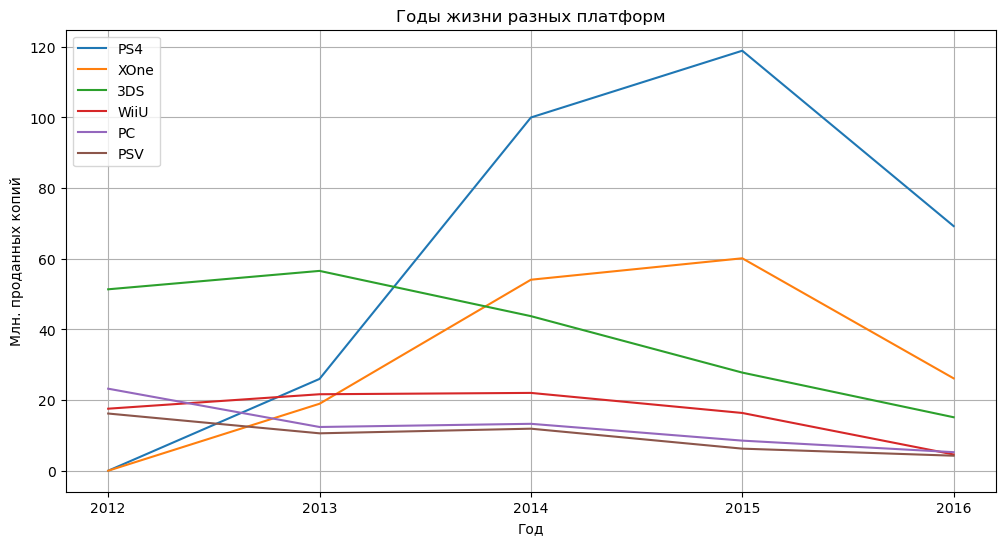

In [29]:
plt.figure(figsize=(10, 5))

platform_sales_total.plot()

plt.xticks(range(good_data['year_of_release'].min(),good_data['year_of_release'].max() + 1))
plt.xlabel('Год')
plt.ylabel('Млн. проданных копий')
plt.title('Годы жизни разных платформ')
plt.legend(loc=2)
plt.grid(visible=True)

plt.show()

На тренд 2015-2016 года можно не обращать внимания, т.к. за 2016 год данные пока что неполные. В остальном, предлагаю оставить для исследования 2014, 2015 и неполный 2016 годы. Платформы: Xbox One, PS4, PC, 3DS, WiiU, PSV - это все текущие поколения консолей на тот год и ПК.

In [30]:
good_data = good_data[good_data['year_of_release'] >= 2014]

<div class="alert alert-info"> 
<b>Важно  </b>

Дальше в исследовании используются данные за 2014 - начало 2016 годы

### Описание продаж по платформам

In [31]:
ordered_platforms = ['PS4', 'XOne', 'PC', 'WiiU', '3DS', 'PSV']

In [32]:
# Количество проданных игр по платформам
platform_groups = good_data.groupby('platform').agg(
    count_of_games=('total_sales','count'),
    mean_sales=('total_sales','mean'),
    median_sales=('total_sales','median'),
    total_sum_sales=('total_sales','sum')
).sort_values(by='median_sales', ascending=False)
print('Суммарные продажи по платформам за 2014-2016 годы, млн. копий')
platform_groups.style.background_gradient()

Суммарные продажи по платформам за 2014-2016 годы, млн. копий


,count_of_games,mean_sales,median_sales,total_sum_sales
platform,,,,
XOne,228,0.615614,0.205000,140.360000
WiiU,73,0.588767,0.190000,42.980000
PS4,376,0.766356,0.185000,288.150000
3DS,212,0.408868,0.090000,86.680000
PC,151,0.179139,0.060000,27.050000
PSV,295,0.075932,0.040000,22.400000


In [33]:
over_mil_sales = pd.DataFrame({
    'count_over_mil': good_data[good_data['total_sales'] > 1]['platform'].value_counts(),
    'count_all': good_data['platform'].value_counts()
})
over_mil_sales['ratio'] = round(over_mil_sales['count_over_mil'] / over_mil_sales['count_all'] * 100, 1)

x = PrettyTable()

x.field_names = ['Platform', 'Num of games sold over 1M copies', 'Total sales', '% of games sold over 1M']

for row in over_mil_sales.itertuples():
    x.add_row(row)

print(x)

+----------+----------------------------------+-------------+-------------------------+
| Platform | Num of games sold over 1M copies | Total sales | % of games sold over 1M |
+----------+----------------------------------+-------------+-------------------------+
|   3DS    |                16                |     212     |           7.5           |
|    PC    |                4                 |     151     |           2.6           |
|   PS4    |                69                |     376     |           18.4          |
|   PSV    |                1                 |     295     |           0.3           |
|   WiiU   |                11                |      73     |           15.1          |
|   XOne   |                43                |     228     |           18.9          |
+----------+----------------------------------+-------------+-------------------------+


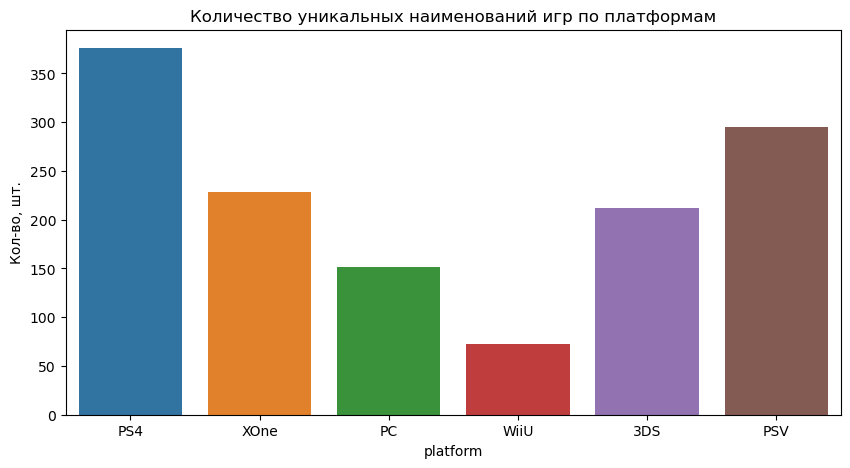

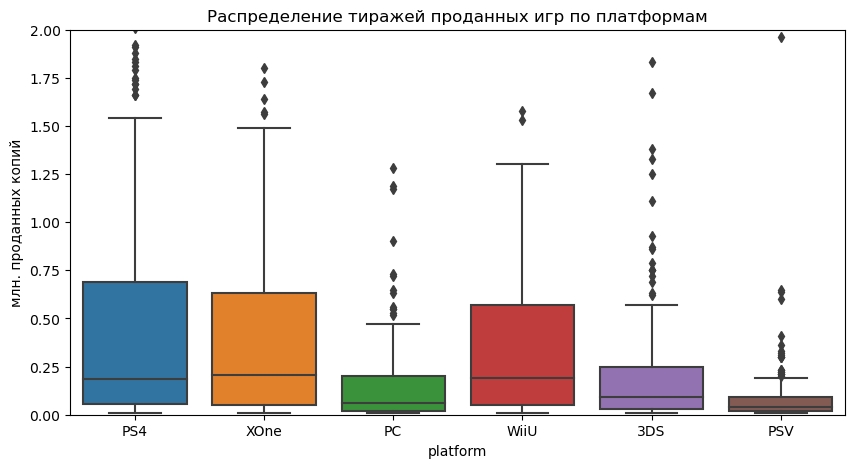

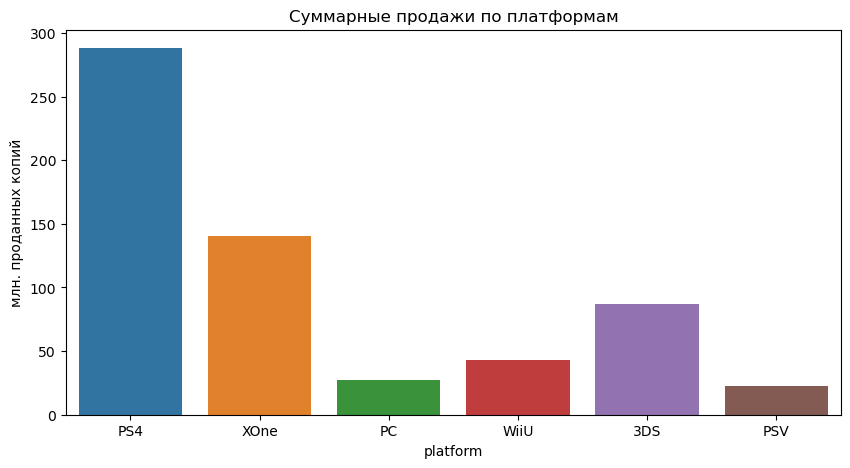

In [34]:
# График по количеству уникальных игр на каждой платформе
plt.figure(figsize=(10, 5))

sns.barplot(
    x=platform_groups.index,
    y=platform_groups['count_of_games'],
    order=ordered_platforms
)
plt.ylabel('Кол-во, шт.')
plt.title('Количество уникальных наименований игр по платформам')

plt.show()

# График по размерам тиражей продаж игр по платформам
plt.figure(figsize=(10, 5))

ax = sns.boxplot(
    x='platform',
    y='total_sales',
    data=good_data,
    order=ordered_platforms
)
plt.ylabel('млн. проданных копий')
plt.title('Распределение тиражей проданных игр по платформам')

plt.ylim((0,2))

plt.show()

# График суммарных продаж по платформам
plt.figure(figsize=(10, 5))

sns.barplot(
    x=platform_groups.index,
    y=platform_groups['total_sum_sales'],
    order=ordered_platforms
)
plt.ylabel('млн. проданных копий')
plt.title('Суммарные продажи по платформам')

plt.show()

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

Максимальные продажи игр - у PS4. Количество тайтлов у Sony наибольшее и в среднем продаются они бОльшими тиражами.

На XBox и количество игр поменьше, и тиражи не такие высокие. По суммарным продажам XBox на втором месте.

У 3DS тиражи хоть и поменьше, но за счет количества игр суммарные продажи неплохие.

У WiiU - количество игр суммарные продажи отстают, но каждая игра продается неплохими тиражами (сравнимо с PS4 и XBox)

На ПК и PSV - хоть количество игр и не маленькое, но продаются они очень маленькими тиражами.

### Зависимость продаж от оценки критиков и игроков

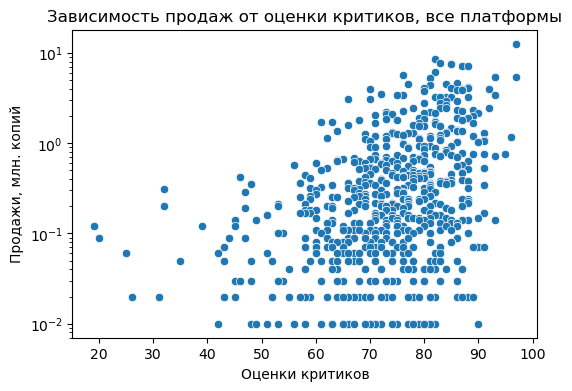

critic_score_groups,lower than average,good,excellent
count,32,321,303


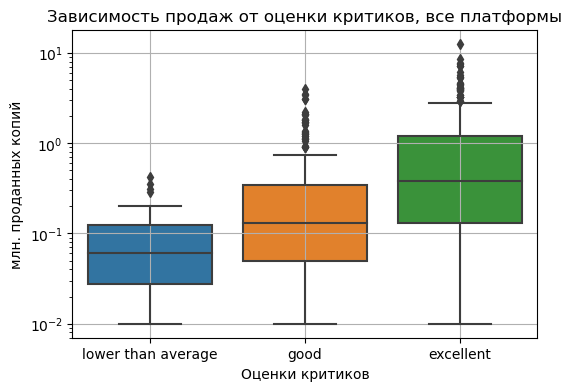

In [35]:
# Диаграмма рассеяния для зависимости продаж от оценок критиков
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=good_data[['critic_score', 'user_score', 'total_sales']],
    x='critic_score',
    y='total_sales'
)
plt.title('Зависимость продаж от оценки критиков, все платформы')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, млн. копий')

plt.yscale('log')
plt.show()

# Для понимания количества игр в каждой группе:
display(good_data['critic_score_groups'].value_counts().to_frame().T[['lower than average', 'good', 'excellent']])

# Боксплоты для каждой группы
good_data['critic_score_groups'] = pd.cut(good_data['critic_score'],
       bins=[0,50,75,100],
       labels=['lower than average', 'good', 'excellent'])

plt.figure(figsize=(6,4))

ax = sns.boxplot(
    x='critic_score_groups',
    y='total_sales',
    data=good_data
)
plt.xlabel('Оценки критиков')
plt.ylabel('млн. проданных копий')
plt.title('Зависимость продаж от оценки критиков, все платформы')

plt.yscale('log')
plt.grid()

plt.show()

В общем случае, на оценки критиков можно положиться. Градация объемов продаж по группам оценок четко прослеживается. Чем выше оценки - тем выше продажи.

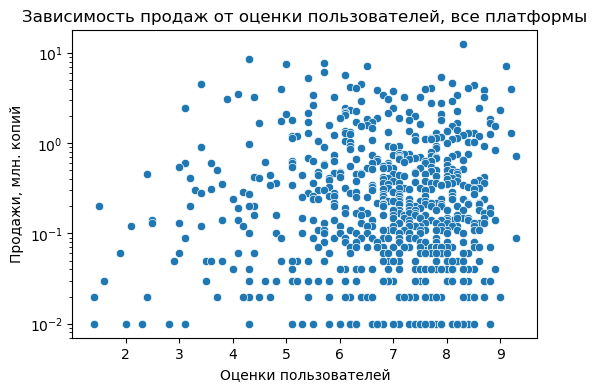

user_score_groups,lower than average,good,excellent
count,82,362,261


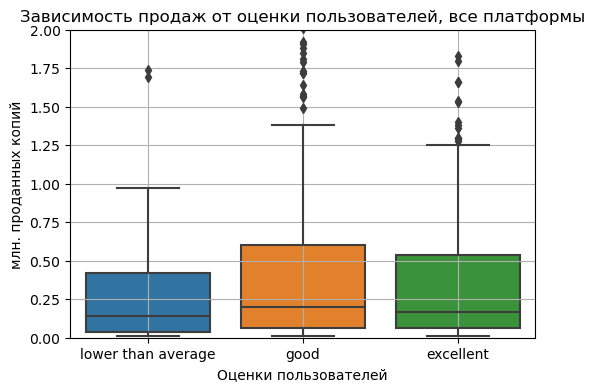

In [36]:
# Диаграмма рассеяния для зависимости продаж от оценок пользователей
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=good_data[['critic_score', 'user_score', 'total_sales']],
    x='user_score',
    y='total_sales'
)
plt.title('Зависимость продаж от оценки пользователей, все платформы')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи, млн. копий')

plt.yscale('log')
plt.show()

# Для понимания количества игр в каждой группе:
display(good_data['user_score_groups'].value_counts().to_frame().T[['lower than average', 'good', 'excellent']])

# Разбивка оценок пользователей на 3 группы
# И боксплоты для каждой группы
plt.figure(figsize=(6,4))

ax = sns.boxplot(
    x='user_score_groups',
    y='total_sales',
    data=good_data
)
plt.xlabel('Оценки пользователей')
plt.ylabel('млн. проданных копий')
plt.title('Зависимость продаж от оценки пользователей, все платформы')

plt.ylim((0,2))
plt.grid()

plt.show()

В общем случае, ориентироваться на оценки пользователей не стоит - зависимость продаж от оценок игроков практически не прослеживается

In [37]:
# Коэффициенты корреляции Пирсона зависимости продаж от оценок, по платформам
summary_platforms = pd.DataFrame()

for i in ordered_platforms:
    summary_platforms[i] = good_data[good_data['platform'] == i][['critic_score', 'user_score', 'total_sales']]\
        .corr()['total_sales'].drop('total_sales', axis=0)

print('Коэффициенты корреляции Пирсона для зависимости продаж от оценок критиков и игроков:')
summary_platforms.style.background_gradient(axis=1)

Коэффициенты корреляции Пирсона для зависимости продаж от оценок критиков и игроков:


,PS4,XOne,PC,WiiU,3DS,PSV
critic_score,0.402661,0.428677,0.174634,0.370201,0.314117,0.042665
user_score,-0.040132,-0.070384,-0.071597,0.407926,0.215193,-0.168455


In [38]:
# Коэффициенты корреляции Спирмена зависимости продаж от оценок, по платформам
summary_platforms = pd.DataFrame()

for i in ordered_platforms:
    summary_platforms[i] = good_data[good_data['platform'] == i][['critic_score', 'user_score', 'total_sales']]\
        .corr(method='spearman')['total_sales'].drop('total_sales', axis=0)

print('Коэффициенты корреляции Спирмена для зависимости продаж от оценок критиков и игроков:')
summary_platforms.style.background_gradient(axis=1)

Коэффициенты корреляции Спирмена для зависимости продаж от оценок критиков и игроков:


,PS4,XOne,PC,WiiU,3DS,PSV
critic_score,0.503512,0.545076,0.340775,0.453655,0.376382,0.175206
user_score,-0.005280,-0.076140,-0.060214,0.446027,0.136066,0.009273


In [39]:
# Коэффициенты корреляции Кендала зависимости продаж от оценок, по платформам
summary_platforms = pd.DataFrame()

for i in ordered_platforms:
    summary_platforms[i] = good_data[good_data['platform'] == i][['critic_score', 'user_score', 'total_sales']]\
        .corr(method='kendall')['total_sales'].drop('total_sales', axis=0)

print('Коэффициенты корреляции Кендала для зависимости продаж от оценок критиков и игроков:')
summary_platforms.style.background_gradient(axis=1)

Коэффициенты корреляции Кендала для зависимости продаж от оценок критиков и игроков:


,PS4,XOne,PC,WiiU,3DS,PSV
critic_score,0.357568,0.379127,0.241944,0.328281,0.277848,0.120927
user_score,-0.003320,-0.053143,-0.039966,0.327769,0.102851,0.001181


In [40]:
# Коэффициенты корреляции Phi зависимости продаж от оценок, по платформам
summary_phi = pd.DataFrame()
interval_cols = ['critic_score', 'user_score', 'total_sales']

for i in ordered_platforms:
    platform_slice = good_data[good_data['platform'] == i][['critic_score', 'user_score', 'total_sales']]
    summary_phi[i] = phik_matrix(
        platform_slice,
        interval_cols=interval_cols
    )['total_sales'].drop('total_sales', axis=0)

print('Коэффициенты корреляции Phi для зависимости продаж от оценок критиков и игроков:')
summary_phi.style.background_gradient(axis=1)

Коэффициенты корреляции Phi для зависимости продаж от оценок критиков и игроков:


,PS4,XOne,PC,WiiU,3DS,PSV
critic_score,0.323690,0.280418,0.237627,0.000000,0.151880,0.131679
user_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.126396


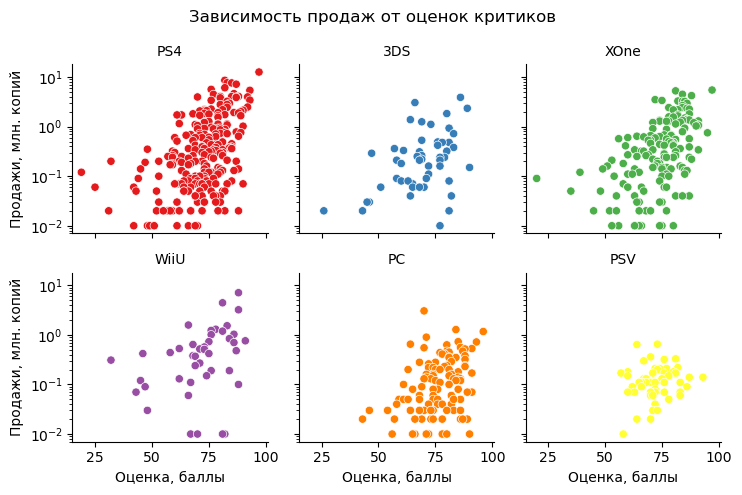

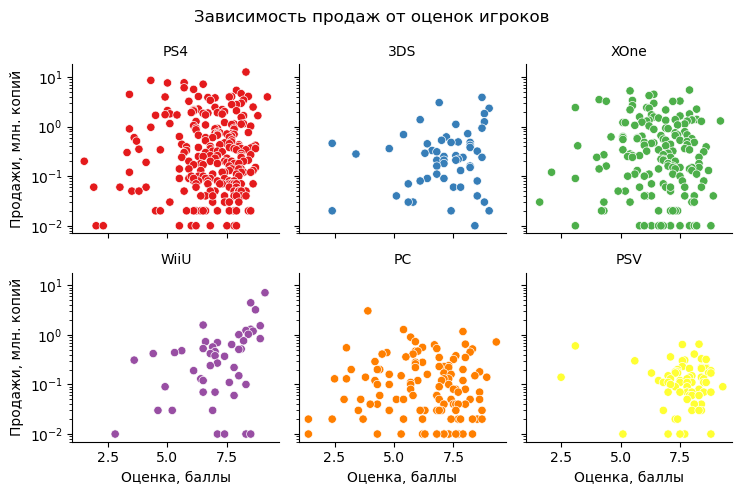

In [41]:
# Critics scores - sales scatterplot
area_plots = sns.relplot(
    data=good_data,
    x='critic_score',
    y='total_sales',
    hue='platform',
    col='platform',
    col_wrap=3,
    height=2.5,
    palette='Set1',
    legend=False
)

area_plots.fig.suptitle('Зависимость продаж от оценок критиков')
area_plots.set_titles(col_template="{col_name}")

# Можно изменить подписи осей
area_plots.set_axis_labels('Оценка, баллы', 'Продажи, млн. копий')

plt.tight_layout()
plt.yscale('log')

plt.show()

# Users scores - sales scatterplot
area_plots = sns.relplot(
    data=good_data,
    x='user_score',
    y='total_sales',
    hue='platform',
    col='platform',
    col_wrap=3,
    height=2.5,
    palette='Set1',
    legend=False
)

area_plots.fig.suptitle('Зависимость продаж от оценок игроков')
area_plots.set_titles(col_template="{col_name}")

# Можно изменить подписи осей
area_plots.set_axis_labels('Оценка, баллы', 'Продажи, млн. копий')

plt.tight_layout()
plt.yscale('log')

plt.show()

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

Корреляция между оценками критиков и объемами продаж прослеживается на всех исследуемых платформах, за исключением PSV. Если проанализировать матрицы рассеивания, то можно сделать вывод, что высокие продажи достигают только игры с высокими оценками критиков. Низкие продажи же могут быть у игры с любой оценкой. Т.е. высокие оценки критиков - необходимый, но не достаточный фактор для высоких продаж.

Что касается оценок пользователей, зависимость слабая практически у всех платформ, за исключение WiiU.

### Продажи и оценки по каждой платформе отдельно

<div class="alert alert-info"> 
<b>Важно  </b>

По каждой платформе отдельно количество игр в каджой категории будет небольшим, обращать внимание на это при оценке графиков

In [42]:
# Функция для построения графиков для каждой платформы
def build_scatter(data, platform):
    '''
    Функция принимает на вход датафрейм и строку с названием платформы
    В датафрейме должны содержаться колонки 'platform', 'critic_score_groups', 'user_score_groups', 'total_sales'
    На выходе - два графика boxplot - для оценок критиков и игроков
    '''
    data_for_plot = data[data['platform'] == platform]

    # Для понимания количества игр в каждой группе:
    display(data_for_plot['critic_score_groups'].value_counts().to_frame().T[['lower than average', 'good', 'excellent']])
    
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(
        x='critic_score_groups',
        y='total_sales',
        data=data_for_plot
    )
    plt.xlabel('Оценки критиков')
    plt.ylabel('млн. проданных копий')
    plt.title(f'Зависимость продаж от оценки критиков, {platform}')
    plt.yscale('log')
    plt.show()

    # Для понимания количества игр в каждой группе:
    display(data_for_plot['user_score_groups'].value_counts().to_frame().T[['lower than average', 'good', 'excellent']])

    
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(
        x='user_score_groups',
        y='total_sales',
        data=data_for_plot
    )
    plt.xlabel('Оценки пользователей')
    plt.ylabel('млн. проданных копий')
    plt.title(f'Зависимость продаж от оценки пользователей, {platform}')
    plt.yscale('log')
    plt.show()

critic_score_groups,lower than average,good,excellent
count,13,121,103


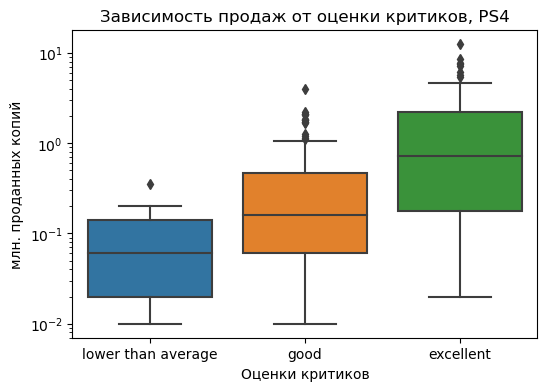

user_score_groups,lower than average,good,excellent
count,26,122,94


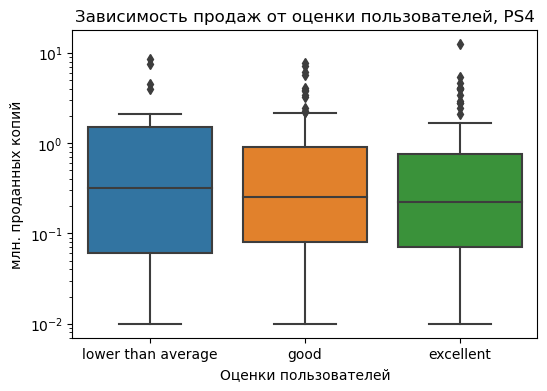

In [43]:
build_scatter(good_data, 'PS4')

critic_score_groups,lower than average,good,excellent
count,6,68,81


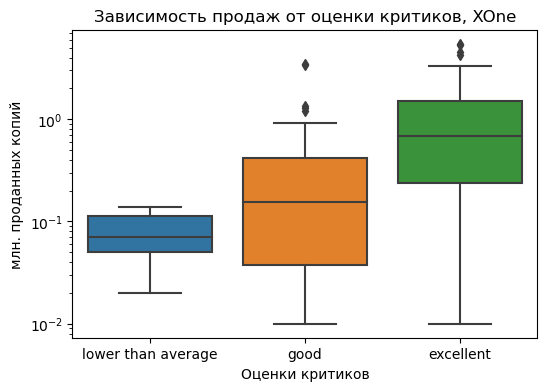

user_score_groups,lower than average,good,excellent
count,17,106,42


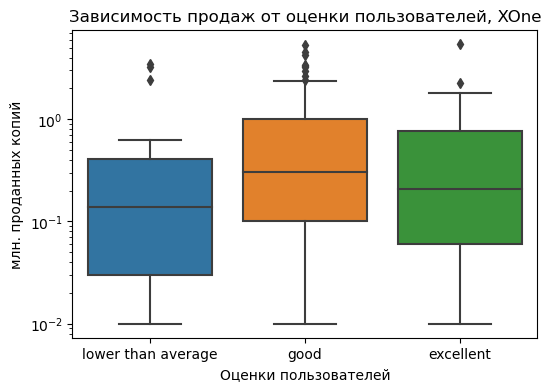

In [44]:
build_scatter(good_data, 'XOne')

critic_score_groups,lower than average,good,excellent
count,2,51,63


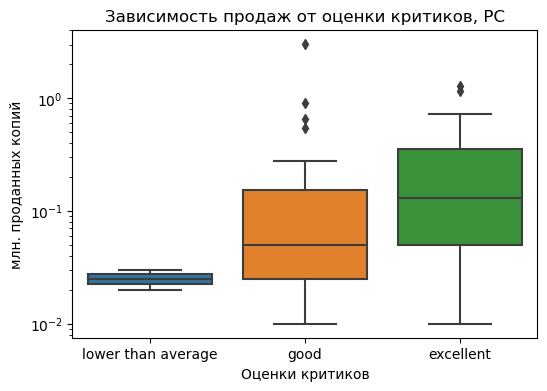

user_score_groups,lower than average,good,excellent
count,28,62,32


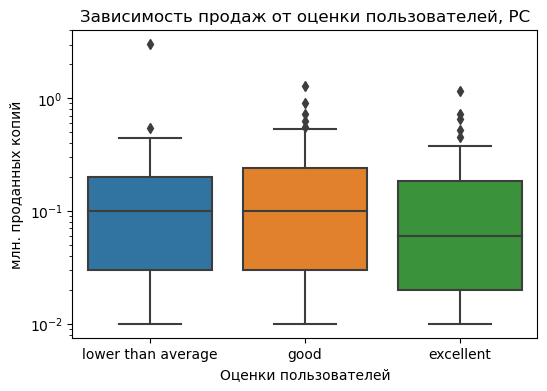

In [45]:
build_scatter(good_data, 'PC')

critic_score_groups,lower than average,good,excellent
count,0,36,18


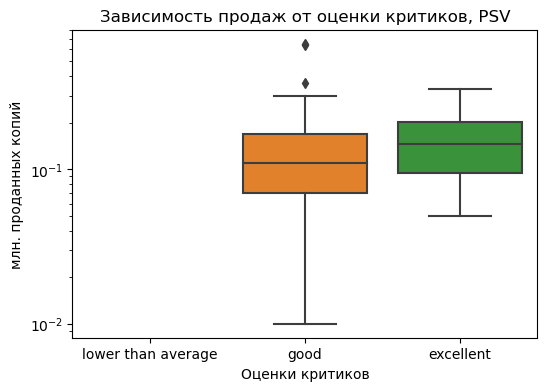

user_score_groups,lower than average,good,excellent
count,2,25,46


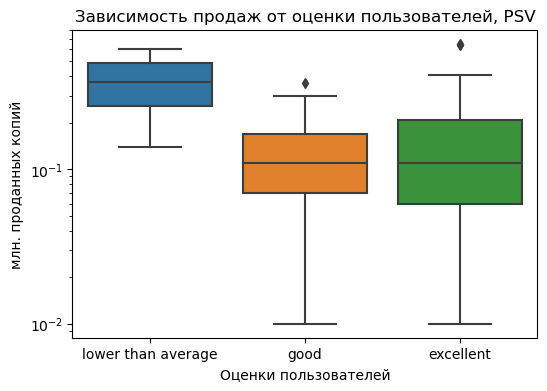

In [46]:
build_scatter(good_data, 'PSV')

critic_score_groups,lower than average,good,excellent
count,6,19,18


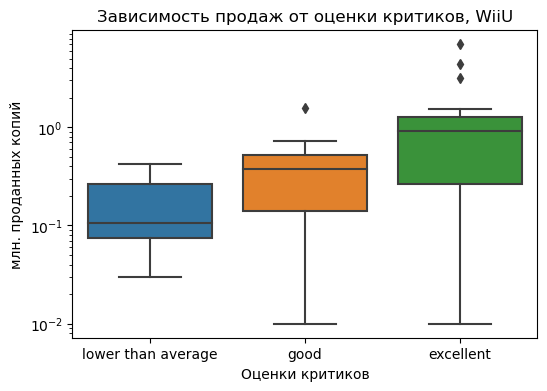

user_score_groups,lower than average,good,excellent
count,5,22,21


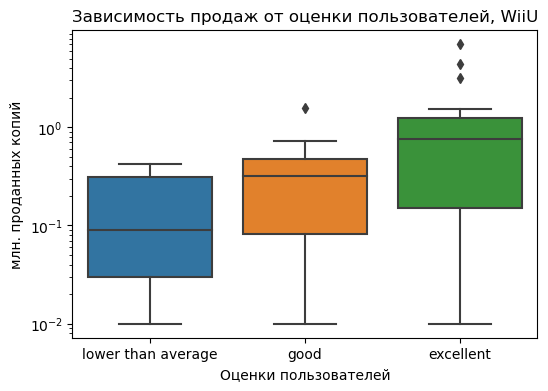

In [47]:
build_scatter(good_data, 'WiiU')

critic_score_groups,lower than average,good,excellent
count,5,26,20


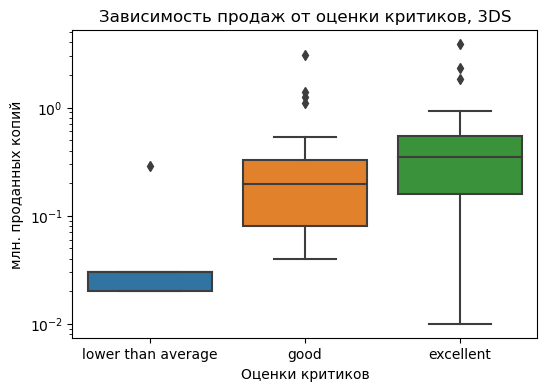

user_score_groups,lower than average,good,excellent
count,4,25,26


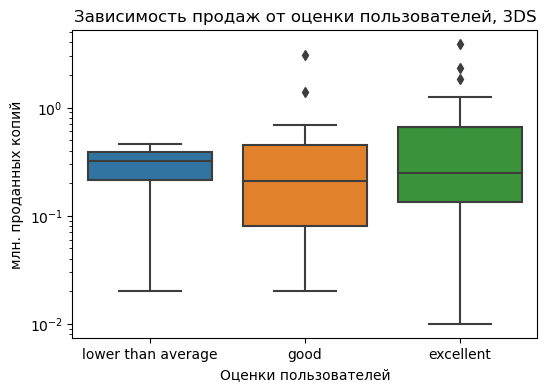

In [48]:
build_scatter(good_data, '3DS')

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>



### Исследовательский анализ данных по жанрам

In [49]:
# Группируем данные по жанрам
good_genres = good_data.groupby('genre')['total_sales'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='median', ascending=False)
good_genres['%_of_sales_above_1.5mln'] = (good_data[good_data['total_sales'] > 1.5]
                                              .value_counts(
                                                  'genre', ascending=False) / good_genres['count'] * 100
                                             ).fillna(0).astype('int')
print('Продажи, млн. копий')
good_genres.style.background_gradient()

Продажи, млн. копий


,count,mean,median,sum,%_of_sales_above_1.5mln
genre,,,,,
Shooter,99,1.465758,0.550000,145.110000,28
Sports,104,0.749615,0.200000,77.960000,15
Platform,33,0.519394,0.150000,17.140000,15
Fighting,38,0.649211,0.125000,24.670000,7
Role-Playing,187,0.492246,0.110000,92.050000,6
Simulation,40,0.308250,0.100000,12.330000,5
Misc,89,0.296966,0.090000,26.430000,4
Racing,53,0.469434,0.090000,24.880000,9
Action,495,0.338465,0.080000,167.540000,4


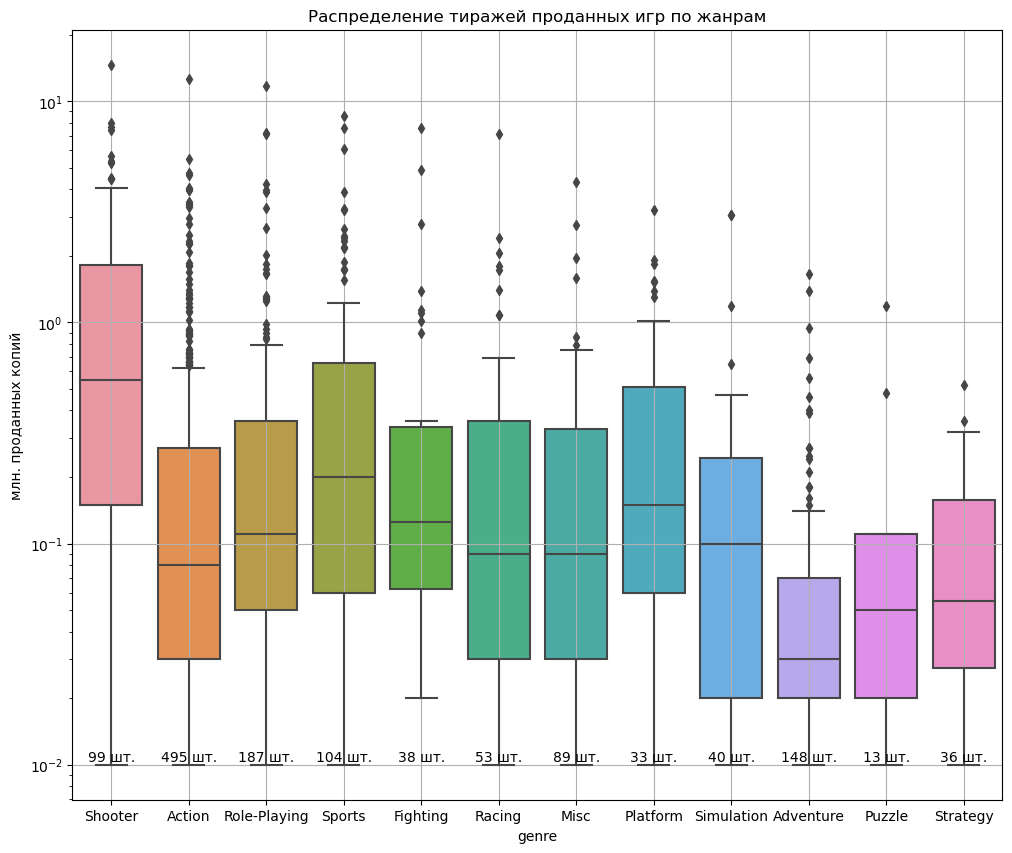

In [50]:
# Строим несколько боксплотов на одном графике
plt.figure(figsize=(12, 10))

ax = sns.boxplot(
    data=good_data,
    x='genre',
    y='total_sales'
)
plt.ylabel('млн. проданных копий')
plt.title('Распределение тиражей проданных игр по жанрам')

counts = good_data['genre'].value_counts()
xticks_positions = ax.get_xticks()
xticks_labels = [i.get_text() for i in ax.get_xticklabels()]

for i, j in zip(xticks_positions, xticks_labels):
    ax.text(
        i,
        good_data['total_sales'].min(),
        f'{counts[j]} шт.',
        ha='center',
        va='bottom'
    )

plt.yscale('log')
plt.grid()

plt.show()

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

Наиболее перпективным жанром оказывается Shooter - достаточное количество игр, и очень высокая продаваемость каждой игры. Медиана продаж в этом жанре в превышает этот показатель у любой другой платформы в 2-5 раз (и более).

Про остальные можно сказать следующее:  
Медианные продажи наибольшие у жанра Sport, за ним - Platform  и Fighting. У них же наивысший % игр с продажами выше 1.5 млн. копий. Также можно отметить жанр Racing за неплохой % игр с продажами выше 1.5 млн. Худшие показатели у жанров Adventure, Puzzle и Strategy. Остальные где-то посередине.

## Статистический анализ данных. Портрет пользователя каждого региона.

Для полноты картины вернем исключенные ранее платформы

In [51]:
stat_data = data[data['year_of_release'] >= 2014]

### Самые популярные платформы (топ-5) в каждом регионе

In [52]:
gruped_platforms = stat_data.groupby('platform').agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
)

gruped_platforms.style.background_gradient()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.640000,16.120000,44.240000
PC,7.230000,17.970000,0.000000
PS3,22.050000,25.540000,11.220000
PS4,98.610000,130.040000,15.020000
PSP,0.000000,0.000000,0.360000
PSV,2.520000,3.530000,14.540000
Wii,2.080000,2.590000,0.000000
WiiU,19.360000,13.150000,7.310000
X360,28.300000,15.490000,0.080000


In [53]:
# Выбираем топ-5
def pie_groups_regions(data, region):
    '''
    Передать датафрейм и название колонки с продажами в конкретном регионе
    '''
    top_5 = data[region].sort_values(ascending=False).iloc[:5]
    top_5['other'] = data[region].sort_values(ascending=False).iloc[5:].sum()
    
    top_5.plot(
        kind='pie',
        legend=True,
        autopct='%.1f'
    )
    
    plt.ylabel('Продажи, млн. копий')
    
    plt.show()

Суммарные продажи по платформам, Северная Америка


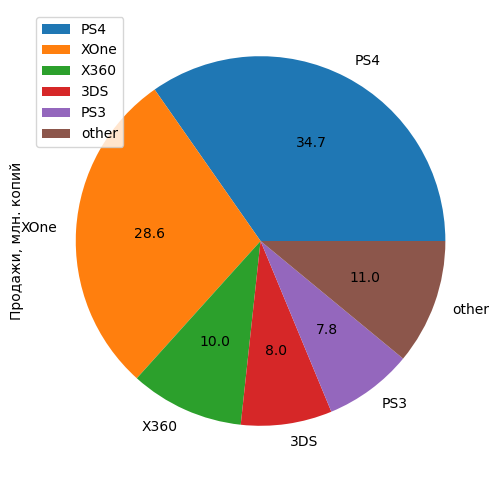

In [54]:
print('Суммарные продажи по платформам, Северная Америка')
pie_groups_regions(gruped_platforms, 'na_sales')

Суммарные продажи по платформам, Европа


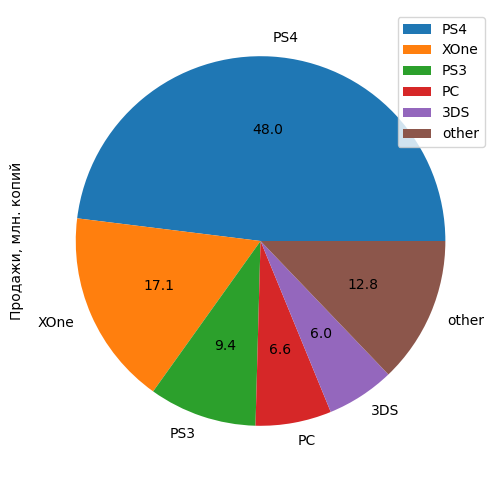

In [55]:
print('Суммарные продажи по платформам, Европа')
pie_groups_regions(gruped_platforms, 'eu_sales')

Суммарные продажи по платформам, Япония


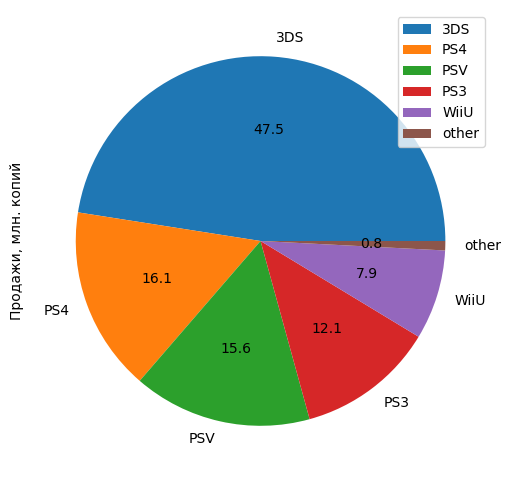

In [56]:
print('Суммарные продажи по платформам, Япония')
pie_groups_regions(gruped_platforms, 'jp_sales')

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

В Америке и Европе на первых местах - PS4 и Xbox. В Японии - 3DS, а за ней PS4, PS3 и PSV.

### Самые популярные жанры (топ-5) в каждом регионе

In [57]:
gruped_genres = good_data.groupby('genre').agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
)

gruped_genres.style.background_gradient()

,na_sales,eu_sales,jp_sales
genre,,,
Action,60.160000,63.490000,24.710000
Adventure,3.920000,4.960000,3.180000
Fighting,11.230000,6.030000,5.010000
Misc,10.260000,8.380000,5.170000
Platform,6.450000,6.350000,2.670000
Puzzle,0.650000,0.520000,0.890000
Racing,7.720000,12.920000,1.640000
Role-Playing,29.740000,25.940000,28.700000
Shooter,66.290000,56.230000,4.210000


Суммарные продажи по жанрам, Северная Америка


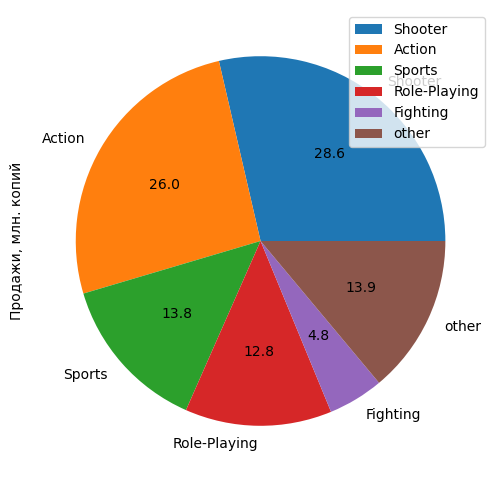

In [58]:
print('Суммарные продажи по жанрам, Северная Америка')
pie_groups_regions(gruped_genres, 'na_sales')

Суммарные продажи по жанрам, Европа


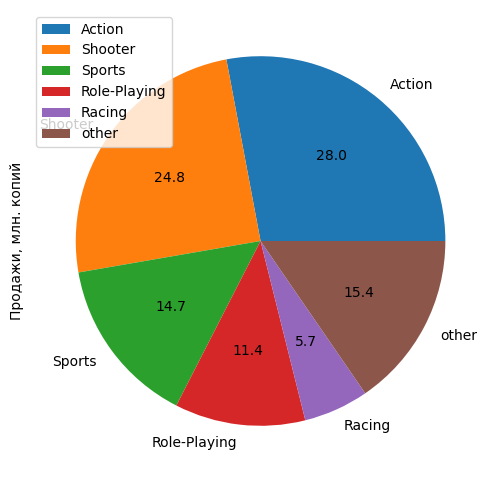

In [59]:
print('Суммарные продажи по жанрам, Европа')
pie_groups_regions(gruped_genres, 'eu_sales')

Суммарные продажи по жанрам, Япония


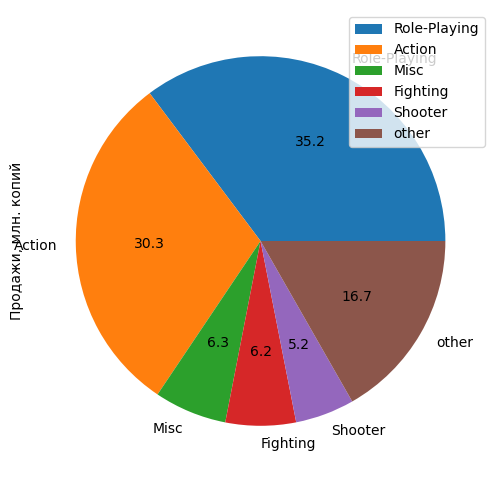

In [60]:
print('Суммарные продажи по жанрам, Япония')
pie_groups_regions(gruped_genres, 'jp_sales')

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

* В Америке и Европе картинка практически идентичная - так любят жанры Action, Shooter, Sports и Role-Playing. На пятом месте в Америке файтинги, а в Европе - гонки.

* В Японии на первом месте Role-Playing и Action. Остальные жанры намного менее популярны.

### Влияние возрастного рейтинга на продажи в каждом регионе

In [61]:
good_data['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [62]:
gruped_rating = good_data.groupby(['rating']).agg(
    na_sales=('na_sales', 'sum'),
    eu_sales=('eu_sales', 'sum'),
    jp_sales=('jp_sales', 'sum')
)
gruped_rating.style.background_gradient()

,na_sales,eu_sales,jp_sales
rating,,,
E,37.650000,45.900000,8.290000
E10+,23.530000,17.890000,4.320000
M,82.230000,82.380000,6.400000
T,32.460000,30.090000,11.990000


Суммарные продажи по рейтингам, Северная Америка


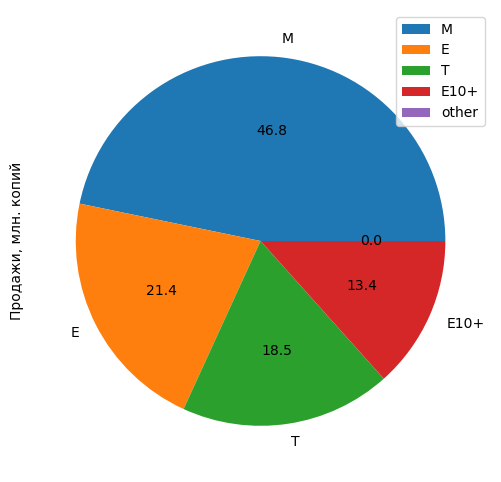

In [63]:
print('Суммарные продажи по рейтингам, Северная Америка')
pie_groups_regions(gruped_rating, 'na_sales')

Суммарные продажи по рейтингам, Европа


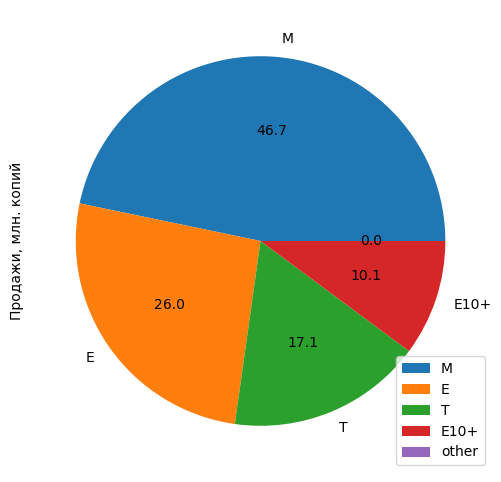

In [64]:
print('Суммарные продажи по рейтингам, Европа')
pie_groups_regions(gruped_rating, 'eu_sales')

Суммарные продажи по рейтингам, Япония


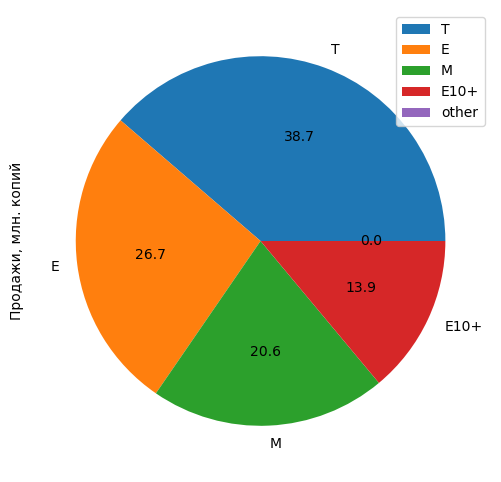

In [65]:
print('Суммарные продажи по рейтингам, Япония')
pie_groups_regions(gruped_rating, 'jp_sales')

<div class="alert alert-info"> 
<b>Промежуточный вывод</b>

* В Америке и Европе преобладают игры 17+ - рейтинг M, на втором месте рейтинг E - игры для всех.
* В Японии же наибольшей популярностью пользуется жанр T - игры для тинейджеров. Второе место - рейтинг E - игры для всех. А игры 17+ только на 3 месте.

<b>Портреты пользователей каждого региона</b>

<b>США и Европа:</b> наиболее популярные жанры - Shooter и Action с рейтингом 17+ на консолях последнего поколения PS4 и XBox.

<b>Япония:</b> ролевые игры и экшн с возрастным ограничением для тинейджеров или без ограничений на консолях 3DS и на всех моделях Sony: PS4, PS3 и PSV

## Проверка гипотез

В проверке гипотез я тоже буду использовать `good_data`, и только те игры, где указан пользовательский рейтинг.

Для проверки гипотез выберем ttest_ind - метод для проверки равенства средних двух независимых выборок.

Примем параметр equal_var=False, т.к. размеры выборок у нас наверняка будут отличаться.

Уровень статистической значимости выберем стандартные 5%.

### Гипотеза 1

Сформулируем гипотезы так:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [66]:
xbox_score_data = good_data[good_data['platform'] == 'XOne']['user_score'].dropna()
pc_score_data = good_data[good_data['platform'] == 'PC']['user_score'].dropna()
print('Количество игр Xbox', len(xbox_score_data), ', средняя пользовательская оценка', xbox_score_data.mean())
print('Количество игр PC', len(pc_score_data), ', средняя пользовательская оценка', pc_score_data.mean())

Количество игр Xbox 165 , средняя пользовательская оценка 6.594545454545456
Количество игр PC 122 , средняя пользовательская оценка 6.298360655737705


Количество наблюдений больше 30 - можно считать, что выборочное среднее в нашем случае распределено нормально.

In [67]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox_score_data, pc_score_data, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Тест показывает, что рейтинги одинаковые с вероятностью 60.3%.

### Гипотеза 2

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [68]:
action_score_data = good_data[good_data['genre'] == 'Action']['user_score'].dropna()
sports_score_data = good_data[good_data['genre'] == 'Sports']['user_score'].dropna()
print('Количество игр Action', len(action_score_data), ', средняя пользовательская оценка', action_score_data.mean())
print('Количество игр Sports', len(sports_score_data), ', средняя пользовательская оценка', sports_score_data.mean())

Количество игр Action 245 , средняя пользовательская оценка 6.828163265306123
Количество игр Sports 86 , средняя пользовательская оценка 5.6360465116279075


Количество наблюдений 30 и 90 - можно считать, что выборочное среднее в нашем случае распределено нормально.

In [69]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_score_data, sports_score_data, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1664151897936176e-08
Отвергаем нулевую гипотезу


Очень маленькое значение p-value - (8.21e-4)%. Гипотеза была бы отвержена при любом выбранном уровне статичтической значимости 0.5-10%.

При прямом сравнении видно, что средние отличаются более чем на единицу. Как оказалось, в статистическом выражении - это целая пропасть.

## Вывод

<div class="alert alert-info"> 
<b>Вывод</b>

<b>Предобработка:</b>  
Большое количество пропусков в столбцах `user_score`, `rating`, `critic_score` - 40-55%. Исследование проводилось без этих данных. Возможно, есть смысл поискать причины этих пропусков, т.к. результаты могут отличаться при повторном исследовании с полным набором данных.

<b>EDA:</b>  
<b>Платформы</b>  
Исследовались следующие платформы: Xbox One, PS4, PC, 3DS, WiiU, PSV и ПК.  
На конец 2015 года: PS4 и XBox One только набирают популярность, WiiU начали постепенно снижаться после максимума в 2014, остальные - 3DS, PC и PSV за последние несколько лет снизили популярность заметно.  
Самые большие суммарные продажи за выбранный период: PS4 288 млн. копий и Xbox 140 млн. копий. Среднее значение продаж одной игры слегка больше на PS4 - 0.76 против 0.62 у Xbox, медиана слегка больше на Xbox 0.2 против 0.18 у PS4. PS4 в основном выигрывает за счет колиества тайтлов - 376 игр по сравнению с 228 у XBox. По доле игр, тираж которых составляет выше 1 миллиона, обе платформы практически одинаковы - около 18.5%.  
У 3DS продано 86 млн. копий, 212 игр, но тиражи примерно в 2 раза меньше, чем у PS4 и Xbox. В среднем 7% игр подаются тиражами выше 1 миллиона.  
На WiiU продавалось 73 игры, общий тираж - 43 млн. копий. Медиана по каждой игре сравнима с большими братьями PS4 и Xbox, а также процент игр, проданных тиражом выше 1 миллиона, составляет 15%.  
На PC и PSV количество игр хоть и сравнимое с конкурентами, продажи значительно ниже.

<b>Оценки критиков</b>  
В целом, все платформы, за исключением PSV, показывают некоторую корреляцию между оценками критиков и объемом продаж. Наиболее сильная корреляция у PS4 и Xbox. Стоит отметить, что высоких продаж достигают только игры с высокими оценками. Это необходимый, но не достаточный фактор для высоких продаж, т.к. игр с высокими оценками и низкими продажами также много.

<b>Жанры</b>  
Наиболее перпективным жанром оказывается Shooter - достаточное количество игр, и очень высокая продаваемость каждой игры. Медиана продаж в этом жанре в превышает этот показатель у любой другой платформы в 2-5 раз (и более).  
Про остальные можно сказать следующее:  
Медианные продажи наибольшие у жанра Sport, за ним - Platform  и Fighting. У них же наивысший % игр с продажами выше 1.5 млн. копий. Также можно отметить жанр Racing за неплохой % игр с продажами выше 1.5 млн. Худшие показатели у жанров Adventure, Puzzle и Strategy. Остальные где-то посередине.

<b>Портреты пользователей каждого региона</b>  
<b>США и Европа:</b> наиболее популярные жанры - Shooter и Action с рейтингом 17+ на консолях последнего поколения PS4 и XBox.  
<b>Япония:</b> ролевые игры и экшн с возрастным ограничением для тинейджеров или без ограничений на консолях 3DS и на всех моделях Sony: PS4, PS3 и PSV  


<b>Проверка гипотез.</b>  
Откорректировать  
В проверке гипотез было произведено сравнение средних рейтингов двух платформ - Xbox One и PC. Гипотезу "рейтинги одинаковые" отвергнуть не удалось опровергнуть. p-value составило целых 99.7%.  
Вторая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые - была опровергнгута. p-value = 1.3193597716949629e-09.

Конец.